In [39]:
library(DESeq2)

In [40]:
# read in a file in R
# get current working directory
getwd()

data <- read.csv("merged_counts.tsv", sep = "\t", header = TRUE, row.names = 1)

[1] "/DKED/scratch/nadjafn/Atlantic_ASE/nf-potato-ase"

In [ ]:
# make the col data for the DESeq2 object
col = data.frame(row.names = colnames(data), condition = c("leaf", "leaf","leaf", "leaf", "leave",  "tuber",  "tuber",  "tuber",  "tuber", "leaf"))

In [41]:
# replace NA with 0
data[is.na(data)] <- 0
# make the DESeq2 object
dds <- DESeqDataSetFromMatrix(countData = data, colData = col, design = ~ condition)

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


In [53]:
data['no_syntelog_chr01_0G_x|hap0_Soltu.DM.01G001690.1|Soltu.Atl_v3.01_0G000020',]

,SRR14993892,SRR14993893,SRR14993894,SRR14993895,SRR14995031,SRR14995032,SRR14995033,SRR14995034,SRR14995933,SRR14996168
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
no_syntelog_chr01_0G_x|hap0_Soltu.DM.01G001690.1|Soltu.Atl_v3.01_0G000020,100,41,518,242,785,526,859,505,507,393


In [42]:
# Filter low count genes
smallestGroupSize <- 3
keep <- rowSums(counts(dds) >= 10) >= smallestGroupSize
dds <- dds[keep,]

In [43]:
dds <- DESeq(dds)
res <- results(dds)


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



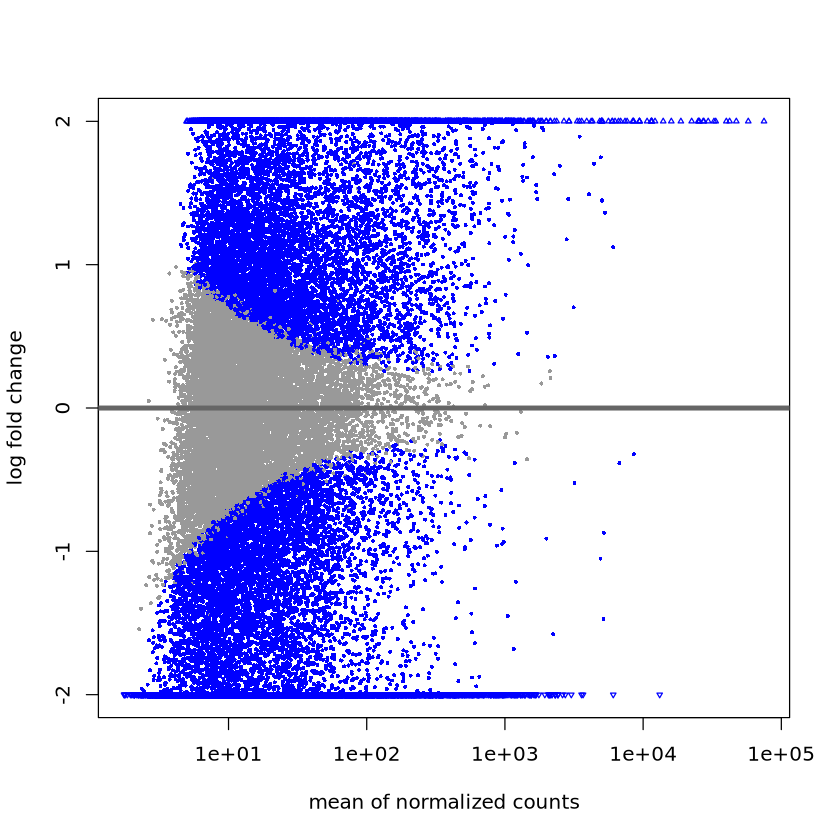

In [44]:
plotMA(res, ylim=c(-2,2))


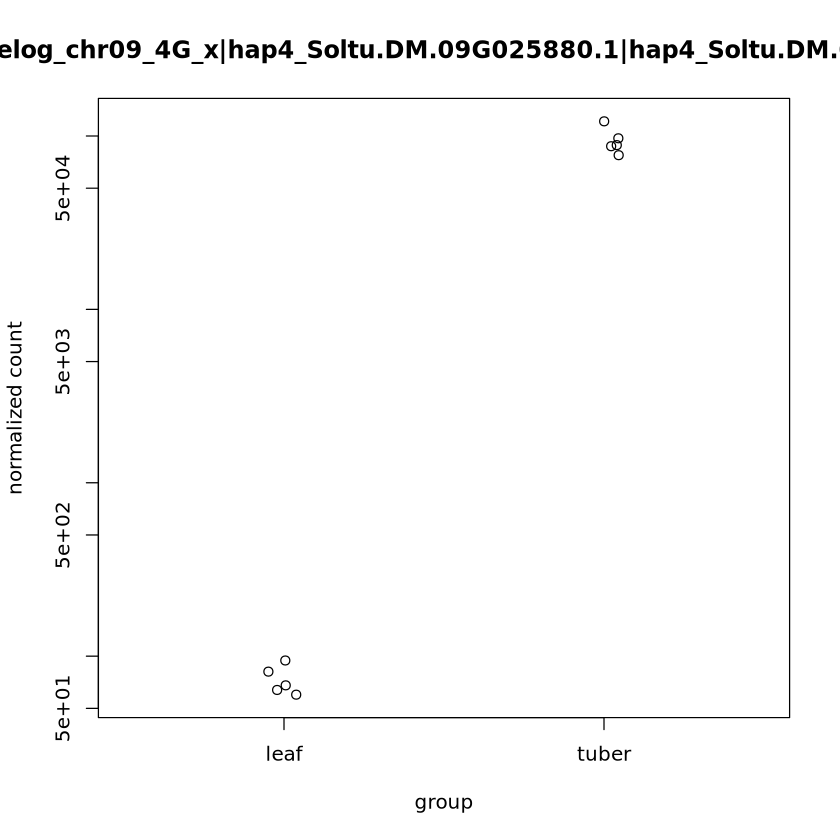

In [45]:
plotCounts(dds, gene=which.min(res$padj), intgroup="condition")

In [46]:
which.min(res$padj)

[1] 492

In [50]:
vsd <- vst(dds, blind=TRUE)
plotPCA(counts(dds), intgroup=c("condition"))

-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.



ERROR: Error: unable to find an inherited method for function ‘plotPCA’ for signature ‘object = "matrix"’


In [49]:
vsd

class: DESeqTransform 
dim: 36978 10 
metadata(1): version
assays(1): ''
rownames(36978):
  no_syntelog_chr01_0G_x|hap0_Soltu.DM.01G001680.1|Soltu.Atl_v3.01_0G000010
  Synt_112_chr01_2G_4x|hap2_Soltu.DM.01G001680.1|Soltu.Atl_v3.01_2G001900
  ...
  no_syntelog_chr12_3G_x|hap3_Soltu.DM.12G003600.1|Soltu.Atl_v3.12_3G003430
  Synt_28640_chr12_4G_3x|hap4_Soltu.DM.12G007220.1|Soltu.Atl_v3.12_4G003670
rowData names(22): baseMean baseVar ... maxCooks dispFit
colnames(10): SRR14993892 SRR14993893 ... SRR14995933 SRR14996168
colData names(2): condition sizeFactor

In [17]:
# print the counts from dds
counts(dds)
dds$sizeFactor

,SRR14993892,SRR14993893,SRR14993894,SRR14993895,SRR14995031,SRR14995032,SRR14995033,SRR14995034,SRR14995933,SRR14996168
no_syntelog_chr01_0G_x|hap0_Soltu.DM.01G001680.1|Soltu.Atl_v3.01_0G000010,3,5,5,12,11,12,11,6,5,2
Synt_112_chr01_2G_4x|hap2_Soltu.DM.01G001680.1|Soltu.Atl_v3.01_2G001900,15,1,28,24,34,25,32,23,20,24
Synt_112_chr01_1G_4x|hap1_Soltu.DM.01G001680.1|Soltu.Atl_v3.01_1G001930,15,5,52,29,12,14,12,7,11,30
Synt_112_chr01_4G_4x|hap4_Soltu.DM.01G001680.1|Soltu.Atl_v3.01_4G001960,13,4,43,21,18,10,12,8,11,28
Synt_112_chr01_3G_4x|hap3_Soltu.DM.01G001680.1|Soltu.Atl_v3.01_3G001750,11,13,57,30,19,6,7,8,10,34
no_syntelog_chr01_0G_x|hap0_Soltu.DM.01G001690.1|Soltu.Atl_v3.01_0G000020,100,41,518,242,785,526,859,505,507,393
no_syntelog_chr01_1G_x|hap1_Soltu.DM.01G001690.1|Soltu.Atl_v3.01_1G001940,316,188,1898,810,1240,785,1375,701,753,1285
Synt_113_chr01_3G_5x|hap3_Soltu.DM.01G001690.1|Soltu.Atl_v3.01_3G001760,136,104,772,435,656,403,667,354,373,599
Synt_24151_chr10_4G_3x|hap4_Soltu.DM.10G003340.1|Soltu.Atl_v3.10_4G001200,3430,1613,17432,8900,18,10,12,4,2,12676
no_syntelog_chr01_4G_x|hap4_Soltu.DM.01G001690.1|Soltu.Atl_v3.01_4G001970,86,52,495,237,745,586,871,482,501,367


SRR14993892 SRR14993893 SRR14993894 SRR14993895 SRR14995031 SRR14995032 
  0.7166412   0.3788942   3.6658167   1.7461094   1.1717251   0.7481340 
SRR14995033 SRR14995034 SRR14995933 SRR14996168 
  0.9577177   0.5351416   0.6960754   2.4344733

In [ ]:
print(dds$)

class: DESeqDataSet 
dim: 36978 10 
metadata(1): version
assays(4): counts mu H cooks
rownames(36978):
  no_syntelog_chr01_0G_x|hap0_Soltu.DM.01G001680.1|Soltu.Atl_v3.01_0G000010
  Synt_112_chr01_2G_4x|hap2_Soltu.DM.01G001680.1|Soltu.Atl_v3.01_2G001900
  ...
  no_syntelog_chr12_3G_x|hap3_Soltu.DM.12G003600.1|Soltu.Atl_v3.12_3G003430
  Synt_28640_chr12_4G_3x|hap4_Soltu.DM.12G007220.1|Soltu.Atl_v3.12_4G003670
rowData names(22): baseMean baseVar ... deviance maxCooks
colnames(10): SRR14993892 SRR14993893 ... SRR14995933 SRR14996168
colData names(2): condition sizeFactor


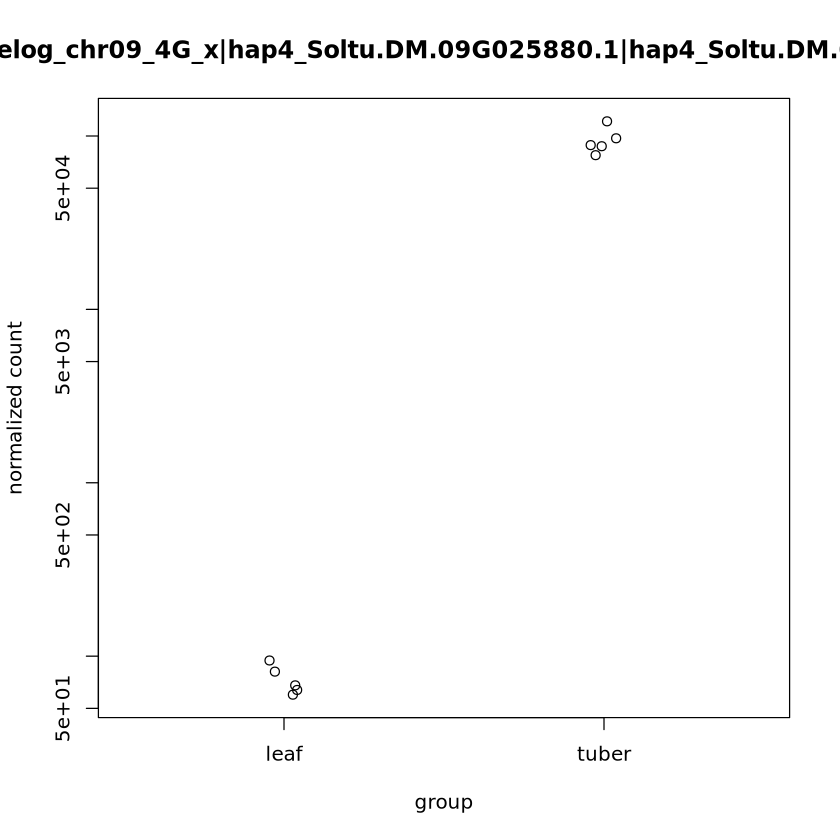

In [25]:
par(bg="white")
plotCounts(dds, gene=which.min(res$padj), intgroup="condition")
# make the plot background white


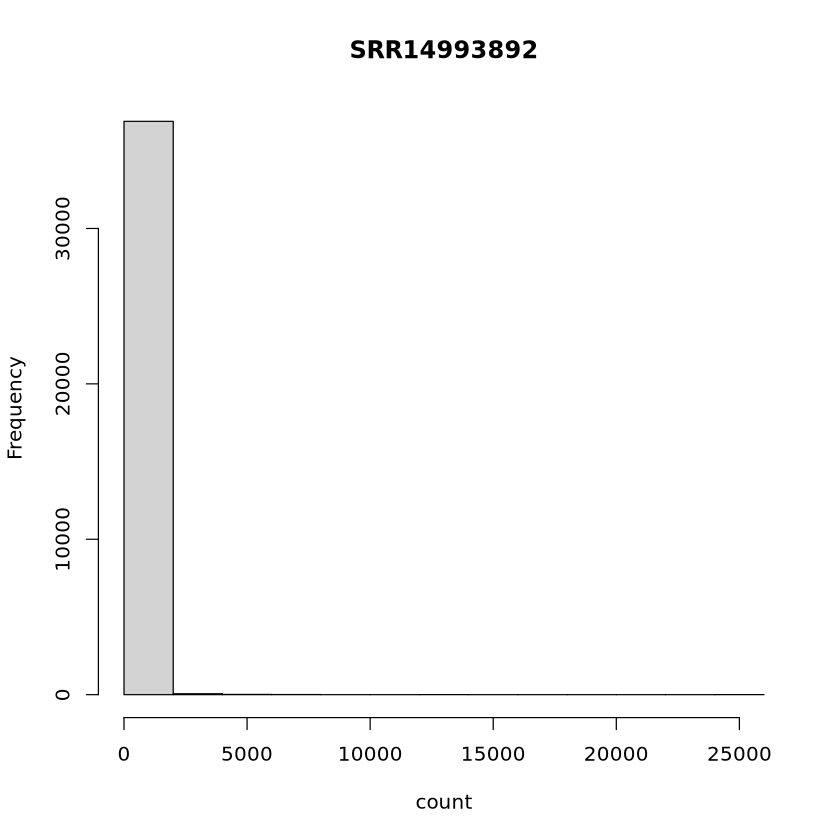

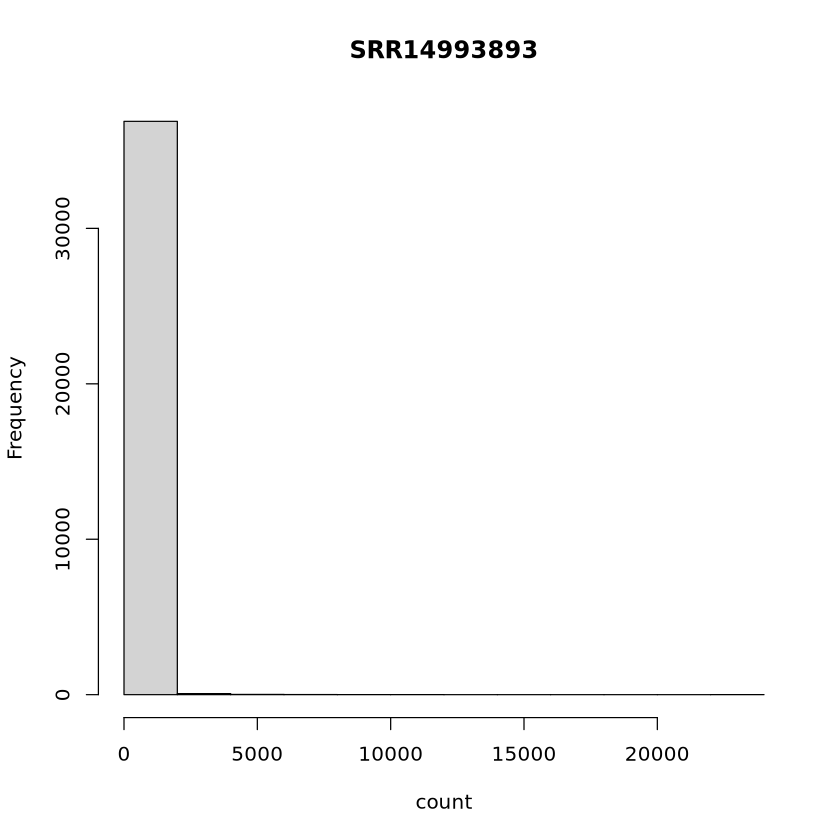

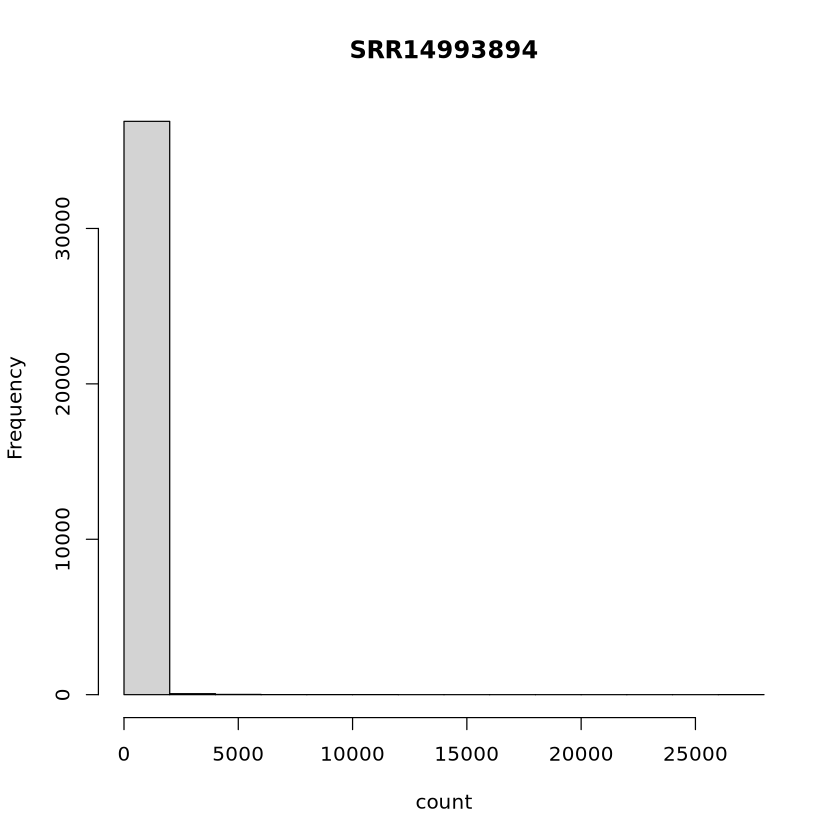

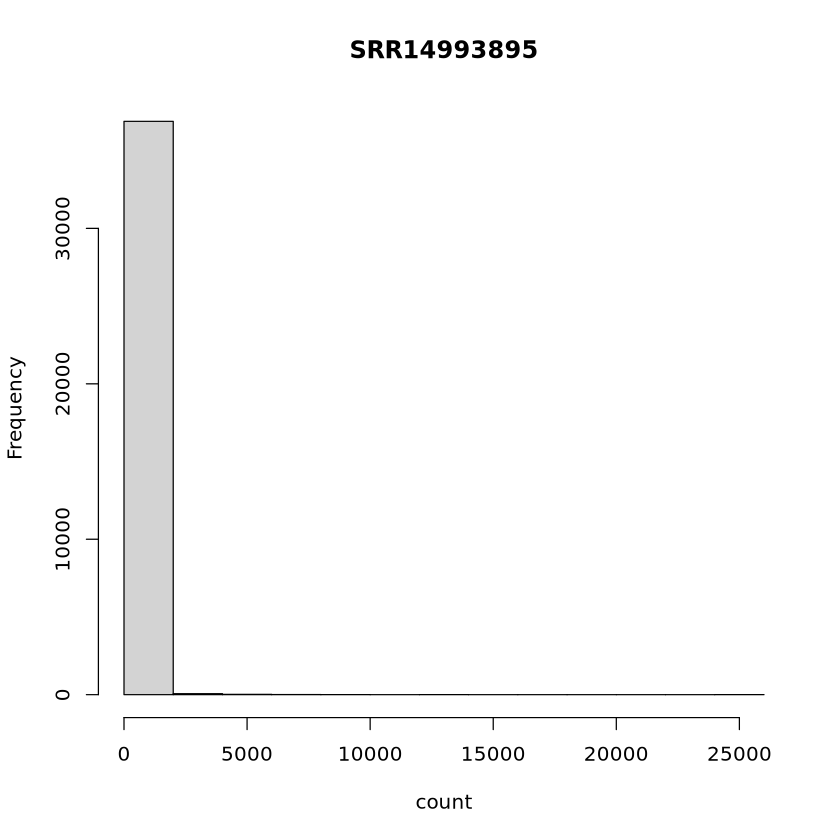

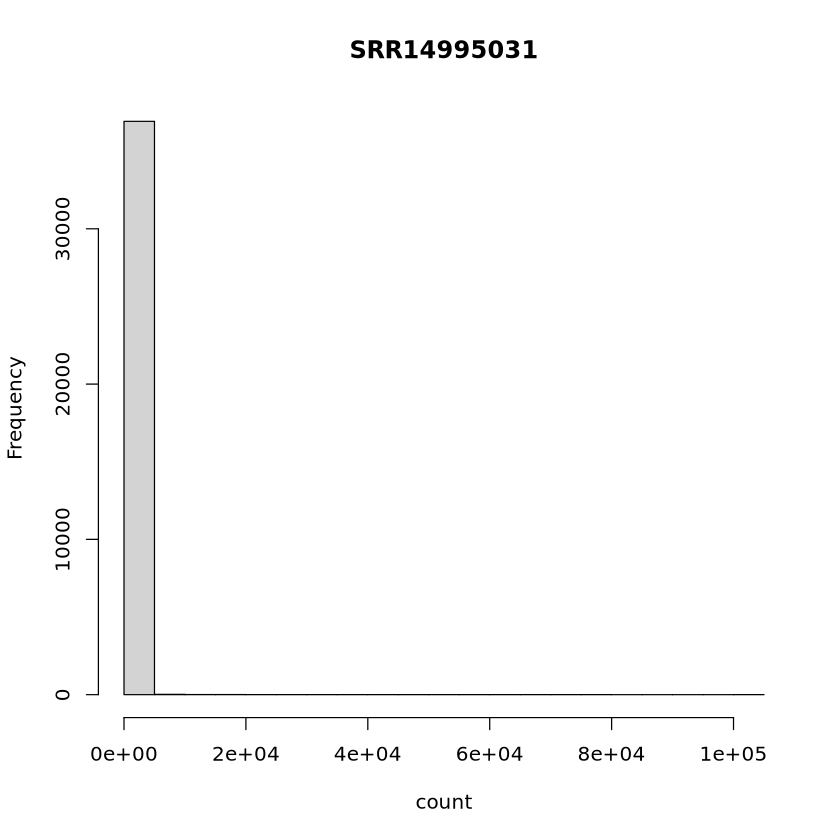

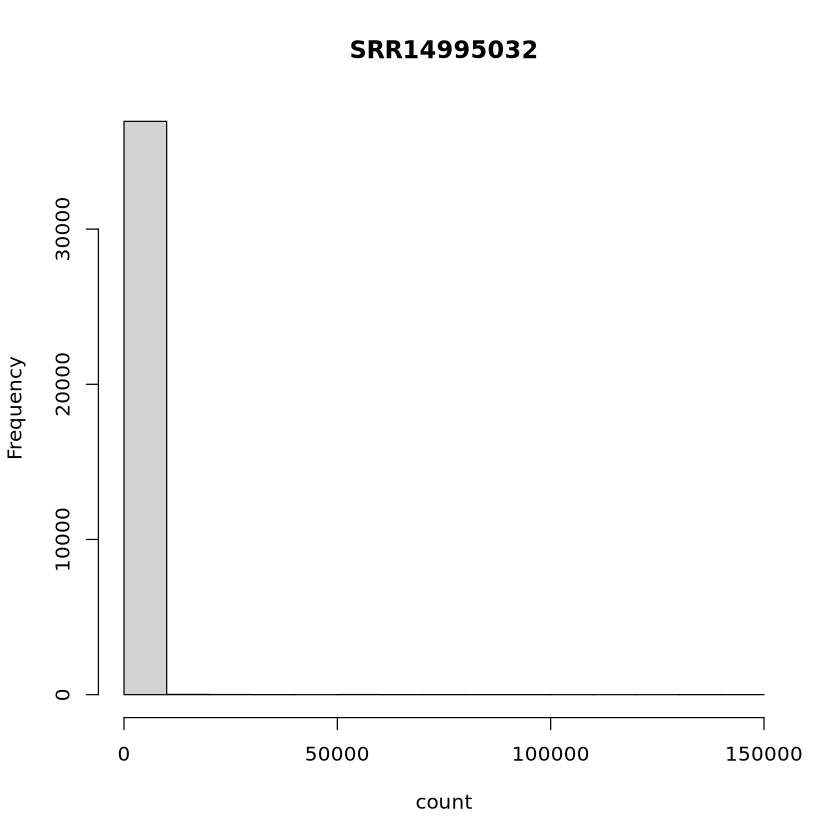

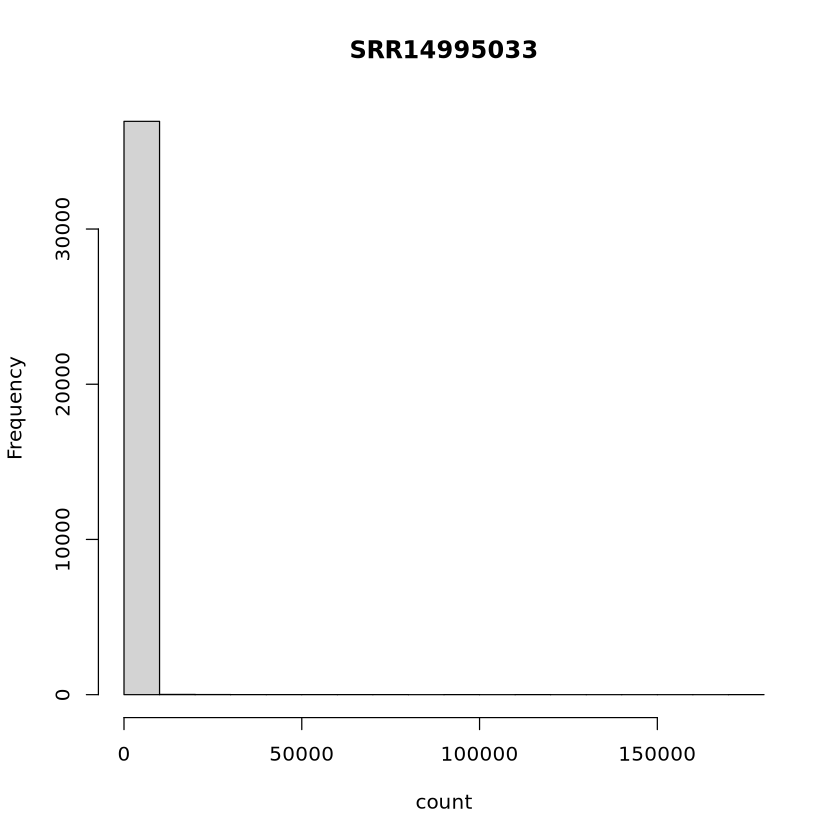

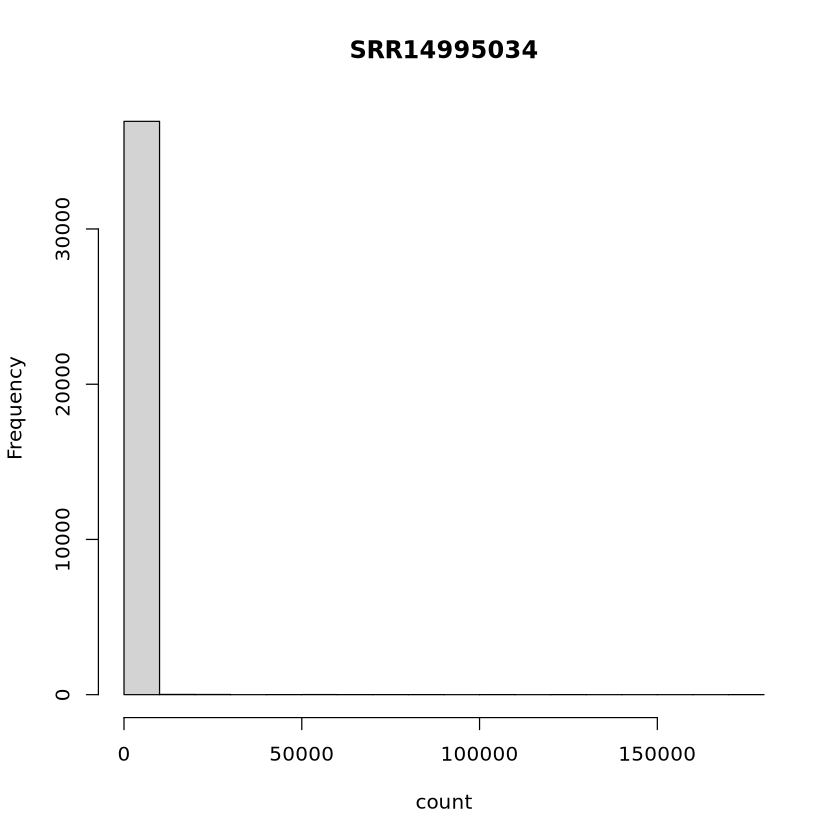

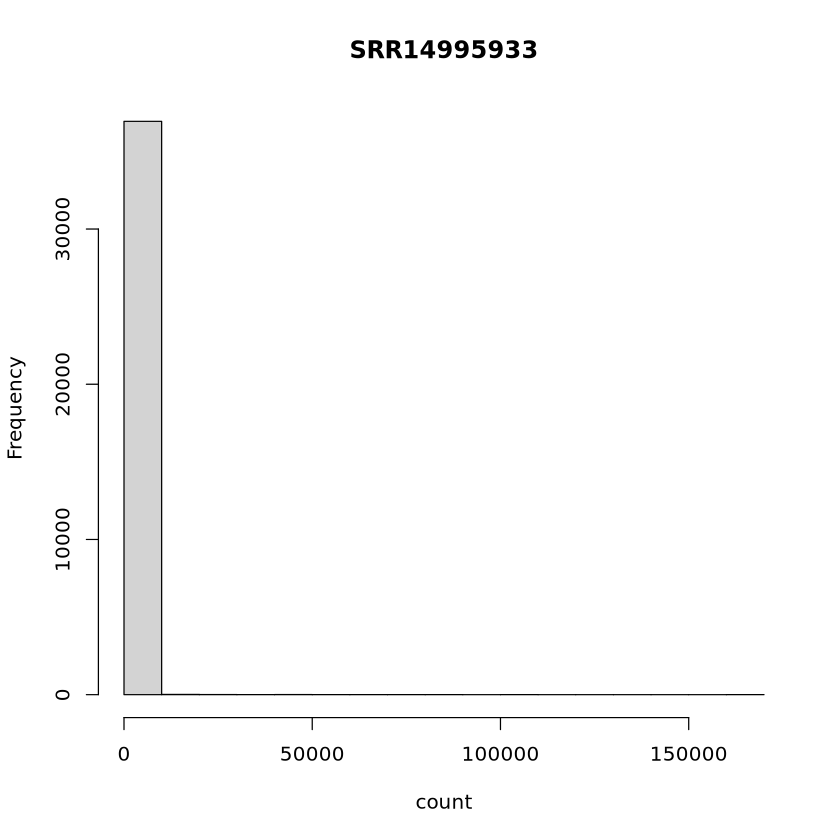

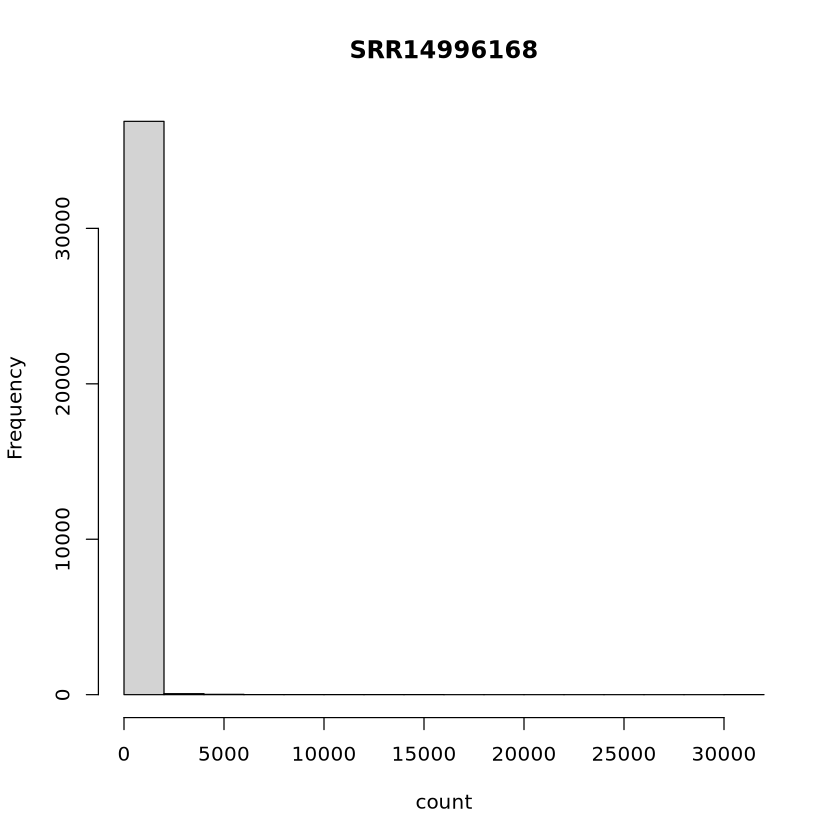

In [55]:
# for every sample plot the count distribution
for (i in colnames(data)){
  par(bg="white")
  hist(norm_counts[,i], main=i, xlab="count")
}

# Cis Allele specific expression


In [56]:
# normalize the counts for library size 
raw_counts <- counts(dds, normalized=FALSE)

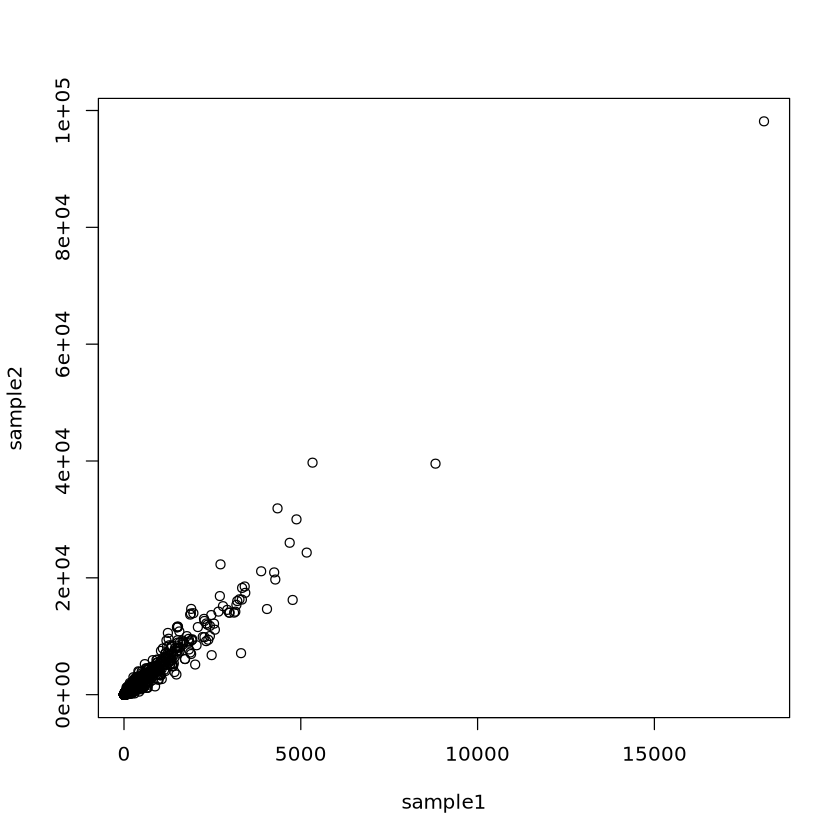

In [61]:
# make scatter plots for the raw counts of two samples for all the sample pairs

par(bg="white")
plot(raw_counts[,1], raw_counts[,3], xlab="sample1", ylab="sample2")



,SRR14993892,SRR14993893,SRR14993894,SRR14993895,SRR14995031,SRR14995032,SRR14995033,SRR14995034,SRR14995933,SRR14996168
no_syntelog_chr01_0G_x|hap0_Soltu.DM.01G001680.1|Soltu.Atl_v3.01_0G000010,4.186195,13.196295,1.363953,6.872422,9.3878673,16.039907,11.485639,11.211986,7.183130,0.8215329
Synt_112_chr01_2G_4x|hap2_Soltu.DM.01G001680.1|Soltu.Atl_v3.01_2G001900,20.930976,2.639259,7.638134,13.744843,29.0170442,33.416473,33.412768,42.979281,28.732521,9.8583953
Synt_112_chr01_1G_4x|hap1_Soltu.DM.01G001680.1|Soltu.Atl_v3.01_1G001930,20.930976,13.196295,14.185107,16.608352,10.2413097,18.713225,12.529788,13.080651,15.802886,12.3229942
Synt_112_chr01_4G_4x|hap4_Soltu.DM.01G001680.1|Soltu.Atl_v3.01_4G001960,18.140179,10.557036,11.729992,12.026738,15.3619646,13.366589,12.529788,14.949315,15.802886,11.5014612
Synt_112_chr01_3G_4x|hap3_Soltu.DM.01G001680.1|Soltu.Atl_v3.01_3G001750,15.349382,34.310368,15.549059,17.181054,16.2154071,8.019954,7.309043,14.949315,14.366260,13.9660600
no_syntelog_chr01_0G_x|hap0_Soltu.DM.01G001690.1|Soltu.Atl_v3.01_0G000020,139.539839,108.209622,141.305484,138.593837,669.9523450,703.082599,896.923981,943.675520,728.369401,161.4312235
no_syntelog_chr01_1G_x|hap1_Soltu.DM.01G001690.1|Soltu.Atl_v3.01_1G001940,440.945893,496.180706,517.756389,463.888464,1058.2686723,1049.277262,1435.704859,1309.933742,1081.779406,527.8349166
Synt_113_chr01_3G_5x|hap3_Soltu.DM.01G001690.1|Soltu.Atl_v3.01_3G001760,189.774182,274.482944,210.594274,249.125286,559.8582654,538.673550,696.447375,661.507197,535.861512,246.0491167
Synt_24151_chr10_4G_3x|hap4_Soltu.DM.10G003340.1|Soltu.Atl_v3.10_4G001200,4786.216494,4257.124891,4755.284179,5097.046082,15.3619646,13.366589,12.529788,7.474658,2.873252,5206.8757995
no_syntelog_chr01_4G_x|hap4_Soltu.DM.01G001690.1|Soltu.Atl_v3.01_4G001970,120.004262,137.241472,135.031303,135.730328,635.8146459,783.282134,909.453769,900.696239,719.749644,150.7512952
